## 1. Importing Libraries

In [31]:
# jupyter nbconvert --to python Extract_Playlist_With_Duplicates.ipynb

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import csv
import pandas as pd
from datetime import datetime

import os
# from subprocess import Popen

from create_lib import create_lib
from get_uniques import get_uniques
# from duplicate_dates import duplicate_dates
from df_d import df_duplicates
from df_nd import df_no_duplicates
# from import_ratings import import_ratings

## 2. Import Data

Reading the Client ID and Client Secret from the .txt file to access my Spotify Developer App.

In [32]:
#Authentication - without user
with open(r"C:\Users\mackt\Python\Music Library\spotify_app_credentials.txt") as f:
    sac_lines = f.readlines()
    cid = sac_lines[0].split(", ")
    cid = cid[1].split("\n")
    cid = cid[0]
    # print(cid)
    secret = sac_lines[1].split(", ")
    secret = secret[1]
    # print(secret)

Passing the credentials through the Spotify API

In [33]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Adding the Playlist link and URI.

In [34]:
# playlist_link = "https://open.spotify.com/playlist/5F5yHyXHt6vp2taA7DrEhJ?si=b4f82e9651444f28"
playlist_link = "https://open.spotify.com/playlist/7LaicnuGlBjUoHZ5Rd4tjm?si=e9f47ebd992b4d08"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

Spotify API only allows you to take 100 songs at a time. This allows you to continue to take 100 songs as many times as you can from the given playlist.

In [35]:
results = sp.playlist_tracks(playlist_URI)
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

In [36]:
for track in tracks:
    print(track["track"]["name"])
    genres_t = []
    for i in range (len(track["track"]["artists"])):
        genres = sp.artist(track["track"]["artists"][i]["id"])["genres"]
        genres_t = genres_t + genres
    print(genres_t)
    print("\n")
    # print(len(sp.artist(track["track"]["artists"])))
# print(sp.audio_analysis(track["track"]["id"]), '\n')
# print(sp.audio_features(track["track"]["uri"]), '\n')
# print(sp.track(track["track"]["uri"]), '\n')
# print(track["track"]["artists"][0]["id"], '\n')
# print(sp.artist(track["track"]["artists"][0]["id"])["genres"], '\n')

The Downfall of Us All
['metalcore', 'pop punk']


The Downfall Of Us All
['metalcore', 'pop punk']


Adam's Song
['pop punk', 'punk', 'rock', 'socal pop punk']


Adam's Song
['pop punk', 'punk', 'rock', 'socal pop punk']


Adam's Song
['pop punk', 'punk', 'rock', 'socal pop punk']


Alive
['dance pop', 'edm', 'electra', 'electro house', 'electropop', 'melodic dubstep', 'pop dance']


Alive
['alternative dance', 'australian dance', 'australian electropop', 'dance rock', 'electropop', 'indietronica', 'neo-synthpop']


Alive
['dance pop', 'edm', 'electra', 'electro house', 'electropop', 'melodic dubstep', 'pop dance']


Alive
['alternative dance', 'australian dance', 'australian electropop', 'dance rock', 'electropop', 'indietronica', 'neo-synthpop']


Alive
['dance pop', 'edm', 'electra', 'electro house', 'electropop', 'melodic dubstep', 'pop dance']


On The Floor
['dance pop', 'pop', 'pop rap', 'urban contemporary', 'dance pop', 'latin', 'miami hip hop', 'pop', 'pop rap']


$outh $ide

### lib - Create a dictionary of all the tracks and their parameters.

### duplicate_index - Create a list of labels, identifying duplicate songs (>0) and unique songs (-1).

In [37]:
lib, duplicate_index = create_lib(sp, tracks)

In [38]:
lib

{'track0': {'id': 0,
  'rating': '',
  'song': 'The Downfall of Us All',
  'song_fil': 'the downfall of us all',
  'artists_info': {'ar_name0': 'A Day To Remember',
   'ar_name0_fil': 'a day to remember',
   'ar_uri0': 'spotify:artist:4NiJW4q9ichVqL1aUsgGAN'},
  'artists': 'A Day To Remember',
  'artists_fil': 'a day to remember',
  'album': 'Homesick',
  'album_fil': 'homesick',
  'date': '',
  'local': 'Yes',
  'genres': ['metalcore', 'pop punk'],
  'time': 209093,
  'popularity': 1,
  'danceability': 0.589,
  'energy': 0.881,
  'key': 0,
  'loudness': -4.62,
  'mode': 1,
  'speechiness': 0.0666,
  'acousticness': 0.000256,
  'instrumentalness': 0,
  'liveness': 0.327,
  'valence': 0.709,
  'tempo': 129.95,
  'uri': 'spotify:track:6G7URf5rGe6MvNoiTtNEP7',
  'duplicates': {'dup_id': 0, 'num_dup': 1, 'dup_loc0': 0, 'dup_loc1': 1},
  'uri0': 'spotify:track:6G7URf5rGe6MvNoiTtNEP7'},
 'track1': {'id': 1,
  'rating': '',
  'song': 'The Downfall Of Us All',
  'song_fil': 'the downfall of us

In [39]:
duplicate_index

[0, 0, 2, 2, 2, 5, 6, 5, 6, 5, -1, -1, -1, -1, -1, -1, -1]

### uniques - List of the different labels in the duplicate_index.

### num_uniques - Number of songs per label.

In [40]:
uniques, num_uniques = get_uniques(duplicate_index)

duplicate_index
 [0, 0, 2, 2, 2, 5, 6, 5, 6, 5, -1, -1, -1, -1, -1, -1, -1]
uniques
 [-1, 0, 2, 5, 6]
Amount per uniques
 [7, 2, 3, 3, 2]


Dataframe with all duplicate songs present.

****Resulting df has some left over columns that were being used in other projects. This will be fixed later to help improve speed and efficiency.

In [41]:
# df_dup = df_duplicates(lib)
# df_dup['date'] = df_dup['date_spot']
# df_dup = df_dup.drop(['rating','date_spot','date_rsch','local'], 1)
# df_dup.to_csv('Playlist.csv', encoding='utf-8', index = False)
# df_dup.head()

In [42]:
# print(df.columns)

In [43]:
lib = df_no_duplicates(lib)
df = pd.DataFrame.from_dict(lib, orient='index')
df.columns

Index(['id', 'rating', 'song', 'song_fil', 'artists_info', 'artists',
       'artists_fil', 'album', 'album_fil', 'date', 'local', 'genres', 'time',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'duplicates', 'uri0', 'uri1', 'uri2'],
      dtype='object')

In [44]:
df = df.drop(['rating','local','song_fil','artists_fil','album_fil'], 1)
df.to_csv('Playlist.csv', encoding='utf-8', index = False)
df.head()

,id,song,artists_info,artists,album,date,genres,time,popularity,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,uri,duplicates,uri0,uri1,uri2
track0,4,Adam's Song,"{'ar_name0': 'blink-182', 'ar_name0_fil': 'bli...",blink-182,Enema Of The State,,"[pop punk, punk, rock, socal pop punk]",249627,71,0.520,...,0.034000,0.0,0.3640,0.382,136.028,spotify:track:6xpDh0dXrkVp0Po1qrHUd8,"{'dup_id': 2, 'num_dup': 2, 'dup_loc0': 2, 'du...",spotify:track:43NhiKnrtGqztxDqXrcUux,spotify:track:4RNeJ1qy9feTpgCI8xxQM1,spotify:track:6xpDh0dXrkVp0Po1qrHUd8
track1,1,The Downfall Of Us All,"{'ar_name0': 'A Day To Remember', 'ar_name0_fi...",A Day To Remember,Homesick,,"[metalcore, pop punk]",209093,69,0.588,...,0.000252,0.0,0.3260,0.709,129.947,spotify:track:1KHKeIouP04dDtl0EetgED,"{'dup_id': 0, 'num_dup': 1, 'dup_loc0': 0, 'du...",spotify:track:6G7URf5rGe6MvNoiTtNEP7,spotify:track:1KHKeIouP04dDtl0EetgED,NaN
track2,16,Don't Stop the Party (feat. TJR),"{'ar_name0': 'Pitbull', 'ar_name0_fil': 'pitbu...","Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),,"[dance pop, latin, miami hip hop, pop, pop rap...",206120,66,0.722,...,0.007260,0.0,0.3750,0.952,127.008,spotify:track:3Tu7uWBecS6GsLsL8UONKn,"{'dup_id': -1, 'num_dup': 0}",spotify:track:3Tu7uWBecS6GsLsL8UONKn,NaN,NaN
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","{'ar_name0': 'A$AP Rocky', 'ar_name0_fil': 'a$...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),,"[east coast hip hop, hip hop, rap, conscious h...",372173,64,0.489,...,0.351000,0.0,0.6980,0.775,81.497,spotify:track:1eLU27PPFxBhbp1CBjPh9J,"{'dup_id': -1, 'num_dup': 0}",spotify:track:1eLU27PPFxBhbp1CBjPh9J,NaN,NaN
track4,6,Alive,"{'ar_name0': 'Empire of the Sun', 'ar_name0_fi...",Empire of the Sun,Ice On The Dune,,"[alternative dance, australian dance, australi...",204591,63,0.524,...,0.099700,0.0,0.0708,0.395,119.954,spotify:track:5WBnKCEsPwsvWHUZmLjS3s,"{'dup_id': 6, 'num_dup': 1, 'dup_loc0': 6, 'du...",spotify:track:5WBnKCEsPwsvWHUZmLjS3s,NaN,NaN


## 3. Pre-Processing Data

### Artists

In [45]:
print(df['artists_info'])

track0     {'ar_name0': 'blink-182', 'ar_name0_fil': 'bli...
track1     {'ar_name0': 'A Day To Remember', 'ar_name0_fi...
track2     {'ar_name0': 'Pitbull', 'ar_name0_fil': 'pitbu...
track3     {'ar_name0': 'A$AP Rocky', 'ar_name0_fil': 'a$...
track4     {'ar_name0': 'Empire of the Sun', 'ar_name0_fi...
track5     {'ar_name0': 'Jennifer Lopez', 'ar_name0_fil':...
track6     {'ar_name0': 'JV.JARVIS', 'ar_name0_fil': 'jv....
track7     {'ar_name0': 'Krewella', 'ar_name0_fil': 'krew...
track8     {'ar_name0': 'M&A', 'ar_name0_fil': 'm&a', 'ar...
track9     {'ar_name0': '$uicideboy$', 'ar_name0_fil': '$...
track10    {'ar_name0': 'Metro Boomin', 'ar_name0_fil': '...
Name: artists_info, dtype: object


In [46]:
df_artists = df.copy()

for index, row in df.iterrows():
    i = 0
    try:
        while row['artists_info']['ar_name{0}'.format(i)]:
            df_artists.at[index, row['artists_info']['ar_name{0}'.format(i)]] = 1
            i += 1
    except KeyError:
        pass
df_artists = df_artists.fillna(0)
df_artists = df_artists.drop(['artists_info'], 1)
df_artists.to_csv('Playlist_artists.csv', encoding='utf-8', index = False)
df_artists

,id,song,artists,album,date,genres,time,popularity,danceability,energy,...,Empire of the Sun,Jennifer Lopez,JV.JARVIS,Krewella,M&A,Бэтси,$uicideboy$,Pouya,Metro Boomin,21 Savage
track0,4,Adam's Song,blink-182,Enema Of The State,,"[pop punk, punk, rock, socal pop punk]",249627,71,0.520,0.775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,1,The Downfall Of Us All,A Day To Remember,Homesick,,"[metalcore, pop punk]",209093,69,0.588,0.881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,16,Don't Stop the Party (feat. TJR),"Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),,"[dance pop, latin, miami hip hop, pop, pop rap...",206120,66,0.722,0.958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),,"[east coast hip hop, hip hop, rap, conscious h...",372173,64,0.489,0.878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,6,Alive,Empire of the Sun,Ice On The Dune,,"[alternative dance, australian dance, australi...",204591,63,0.524,0.885,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track5,10,On The Floor,"Jennifer Lopez, Pitbull",LOVE?,,"[dance pop, pop, pop rap, urban contemporary, ...",284867,62,0.730,0.777,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track6,13,น้ำแดงน้ำส้ม,JV.JARVIS,น้ำแดงน้ำส้ม,,[thai viral pop],156373,62,0.845,0.631,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track7,5,Alive,Krewella,Play Hard EP,,"[dance pop, edm, electra, electro house, elect...",290760,55,0.663,0.822,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
track8,12,Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,"M&A, Бэтси",Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,,[],176542,36,0.942,0.566,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
track9,11,$outh $ide $uicide,"$uicideboy$, Pouya",High Tide In The Snake's Nest,,"[dark trap, new orleans rap, underground hip h...",169320,0,0.797,0.516,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


There are 20 unique genres in the playlist.


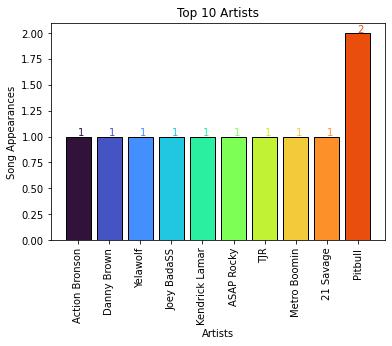

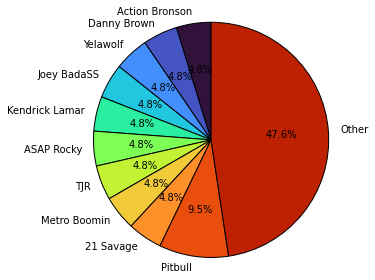

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_pie(x,y):
    # with plt.style.context('dark_background'):
    colors = cm.turbo(np.arange(len(x))/(len(x)))

    # plot
    fig, ax = plt.subplots()
    ax.axis(False)
    ax.pie(x,labels = y, autopct='%0.1f%%',textprops={'color':"black"},colors=colors,
            wedgeprops={"linewidth": 1, "edgecolor": "black"}, frame=True, startangle=90)

    plt.tight_layout()
    plt.show()

def addlabels(x,y,colors):
    for i in range(len(x)):
        plt.text(i,y[i]+0.01,y[i],color = colors[i])

def plot_bar(x,y):
    import matplotlib.pyplot as plt
    import numpy as np
    colors = cm.turbo(np.arange(len(y)+1)/(len(y)+1))
    # plot
    plt.bar(x, y, color = colors, edgecolor='black')
    # calling the function to add value labels
    addlabels(x, y, colors)
    # giving title to the plot
    plt.title("Top 10 Artists")
    # giving X and Y labels
    plt.xlabel("Artists")
    plt.ylabel("Song Appearances")
    plt.xticks(range(len(x)), x, rotation=90)
    plt.show()

num_artists = df_artists.shape[1] - df.shape[1]
artists_cols = df_artists.iloc[:,-num_artists:]
artists_cols.value_counts()

artists_count = artists_cols.isin([1]).sum(axis=0)

ac = list(artists_count)
ac = np.array(ac).reshape((-1, 1))
l = np.array(artists_cols.columns).reshape((artists_cols.columns.size, 1))

ac = np.hstack((ac,l))
ac = ac[ac[:, 0].argsort()]
a = ac[-10:,:]
x = a[:, :1]
x = np.ndarray.tolist(x.reshape(1,-1)[0])
y = a[:, 1:]
y = np.ndarray.tolist(y.reshape(1,-1)[0])
import re
y = [re.sub('\$', 'S', item) for item in y]

print("There are {0} unique genres in the playlist.".format(num_artists))

plot_bar(y,x)

other_count = np.sum(ac[:-10, :1])
other = np.array([other_count,'Other']).reshape((1, -1))
a = np.vstack((ac[-10:,:],other))
x = a[:, :1]
x = np.ndarray.tolist(x.reshape(1,-1)[0])
y = a[:, 1:]
y = np.ndarray.tolist(y.reshape(1,-1)[0])
import re
y = [re.sub('\$', 'S', item) for item in y]

plot_pie(x,y)

### Genres

In [48]:
df_artistsgenres = df_artists.copy()

for index, row in df_artists.iterrows():
    for genre in row['genres']:
            df_artistsgenres.at[index, genre] = 1
df_artistsgenres = df_artistsgenres.fillna(0)
df_artistsgenres = df_artistsgenres.drop(['genres'], 1)
df_artistsgenres.to_csv('Playlist_artists.csv', encoding='utf-8', index = False)
df_artistsgenres

,id,song,artists,album,date,time,popularity,danceability,energy,key,...,urban contemporary,thai viral pop,electra,melodic dubstep,pop dance,dark trap,new orleans rap,aesthetic rap,emo rap,atl hip hop
track0,4,Adam's Song,blink-182,Enema Of The State,,249627,71,0.520,0.775,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,1,The Downfall Of Us All,A Day To Remember,Homesick,,209093,69,0.588,0.881,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,16,Don't Stop the Party (feat. TJR),"Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),,206120,66,0.722,0.958,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),,372173,64,0.489,0.878,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,6,Alive,Empire of the Sun,Ice On The Dune,,204591,63,0.524,0.885,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track5,10,On The Floor,"Jennifer Lopez, Pitbull",LOVE?,,284867,62,0.730,0.777,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track6,13,น้ำแดงน้ำส้ม,JV.JARVIS,น้ำแดงน้ำส้ม,,156373,62,0.845,0.631,9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track7,5,Alive,Krewella,Play Hard EP,,290760,55,0.663,0.822,9,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
track8,12,Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,"M&A, Бэтси",Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,,176542,36,0.942,0.566,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track9,11,$outh $ide $uicide,"$uicideboy$, Pouya",High Tide In The Snake's Nest,,169320,0,0.797,0.516,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [49]:
num_genres = df_artistsgenres.shape[1] - df_artists.shape[1]
genres_cols = df_artistsgenres.iloc[:,-num_genres:]

In [50]:
df_trackparams = df_artistsgenres.iloc[:,:df.shape[1]]
df_trackgenres = df_artistsgenres.iloc[:,-num_genres:]
df_genres = pd.concat([df_trackparams,df_trackgenres], axis = 1)
df_genres

,id,song,artists,album,date,time,popularity,danceability,energy,key,...,urban contemporary,thai viral pop,electra,melodic dubstep,pop dance,dark trap,new orleans rap,aesthetic rap,emo rap,atl hip hop
track0,4,Adam's Song,blink-182,Enema Of The State,,249627,71,0.520,0.775,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,1,The Downfall Of Us All,A Day To Remember,Homesick,,209093,69,0.588,0.881,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,16,Don't Stop the Party (feat. TJR),"Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),,206120,66,0.722,0.958,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),,372173,64,0.489,0.878,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,6,Alive,Empire of the Sun,Ice On The Dune,,204591,63,0.524,0.885,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track5,10,On The Floor,"Jennifer Lopez, Pitbull",LOVE?,,284867,62,0.730,0.777,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track6,13,น้ำแดงน้ำส้ม,JV.JARVIS,น้ำแดงน้ำส้ม,,156373,62,0.845,0.631,9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track7,5,Alive,Krewella,Play Hard EP,,290760,55,0.663,0.822,9,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
track8,12,Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,"M&A, Бэтси",Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,,176542,36,0.942,0.566,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track9,11,$outh $ide $uicide,"$uicideboy$, Pouya",High Tide In The Snake's Nest,,169320,0,0.797,0.516,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [51]:
genres_cols.value_counts()

punk  rock  socal pop punk  metalcore  dance pop  latin  miami hip hop  pop  pop rap  edm  electro house  melbourne bounce  moombahton  progressive electro house  uk garage  east coast hip hop  hip hop  rap  conscious hip hop  west coast rap  underground hip hop  alabama rap  southern hip hop  alternative hip hop  detroit hip hop  escape room  nyc rap  queens hip hop  dirty south rap  gangster rap  mississippi hip hop  trap  alternative dance  australian dance  australian electropop  dance rock  electropop  indietronica  neo-synthpop  urban contemporary  thai viral pop  electra  melodic dubstep  pop dance  dark trap  new orleans rap  aesthetic rap  emo rap  atl hip hop
0.0   0.0   0.0             0.0        0.0        0.0    0.0            0.0  0.0      0.0  0.0            0.0               0.0         0.0                        0.0        0.0                 0.0      0.0  0.0                0.0             0.0                  0.0          0.0               0.0                  0.0   

In [52]:
genres_count = genres_cols.isin([1]).sum(axis=0)
genres_count

punk                         1
rock                         1
socal pop punk               1
metalcore                    1
dance pop                    3
latin                        2
miami hip hop                3
pop                          2
pop rap                      3
edm                          2
electro house                2
melbourne bounce             1
moombahton                   1
progressive electro house    1
uk garage                    1
east coast hip hop           1
hip hop                      2
rap                          2
conscious hip hop            1
west coast rap               1
underground hip hop          2
alabama rap                  1
southern hip hop             2
alternative hip hop          1
detroit hip hop              1
escape room                  1
nyc rap                      1
queens hip hop               1
dirty south rap              1
gangster rap                 1
mississippi hip hop          1
trap                         2
alternat

In [53]:
gc = list(genres_count)
gc = np.array(gc).reshape((-1, 1))
# print(gc)
l = np.array(genres_cols.columns).reshape((genres_cols.columns.size, 1))
print(gc.shape)
print(l.shape)

gc = np.hstack((gc,l))
gc


(49, 1)
(49, 1)


array([[1, 'punk'],
       [1, 'rock'],
       [1, 'socal pop punk'],
       [1, 'metalcore'],
       [3, 'dance pop'],
       [2, 'latin'],
       [3, 'miami hip hop'],
       [2, 'pop'],
       [3, 'pop rap'],
       [2, 'edm'],
       [2, 'electro house'],
       [1, 'melbourne bounce'],
       [1, 'moombahton'],
       [1, 'progressive electro house'],
       [1, 'uk garage'],
       [1, 'east coast hip hop'],
       [2, 'hip hop'],
       [2, 'rap'],
       [1, 'conscious hip hop'],
       [1, 'west coast rap'],
       [2, 'underground hip hop'],
       [1, 'alabama rap'],
       [2, 'southern hip hop'],
       [1, 'alternative hip hop'],
       [1, 'detroit hip hop'],
       [1, 'escape room'],
       [1, 'nyc rap'],
       [1, 'queens hip hop'],
       [1, 'dirty south rap'],
       [1, 'gangster rap'],
       [1, 'mississippi hip hop'],
       [2, 'trap'],
       [1, 'alternative dance'],
       [1, 'australian dance'],
       [1, 'australian electropop'],
       [1, 'dance roc

In [54]:
gc = gc[gc[:, 0].argsort()]
print(gc)
print(gc.shape)

[[1 'punk']
 [1 'escape room']
 [1 'nyc rap']
 [1 'queens hip hop']
 [1 'dirty south rap']
 [1 'gangster rap']
 [1 'mississippi hip hop']
 [1 'alternative dance']
 [1 'australian dance']
 [1 'australian electropop']
 [1 'emo rap']
 [1 'dance rock']
 [1 'neo-synthpop']
 [1 'urban contemporary']
 [1 'thai viral pop']
 [1 'electra']
 [1 'melodic dubstep']
 [1 'pop dance']
 [1 'dark trap']
 [1 'new orleans rap']
 [1 'aesthetic rap']
 [1 'indietronica']
 [1 'alternative hip hop']
 [1 'detroit hip hop']
 [1 'alabama rap']
 [1 'rock']
 [1 'socal pop punk']
 [1 'metalcore']
 [1 'melbourne bounce']
 [1 'moombahton']
 [1 'progressive electro house']
 [1 'uk garage']
 [1 'atl hip hop']
 [1 'east coast hip hop']
 [1 'conscious hip hop']
 [1 'west coast rap']
 [2 'hip hop']
 [2 'rap']
 [2 'southern hip hop']
 [2 'electro house']
 [2 'edm']
 [2 'pop']
 [2 'latin']
 [2 'underground hip hop']
 [2 'trap']
 [2 'electropop']
 [3 'pop rap']
 [3 'miami hip hop']
 [3 'dance pop']]
(49, 2)


In [55]:
other_count = np.sum(gc[:-10, :1])
other = np.array([other_count,'Other']).reshape((1, -1))
print(np.sum(gc[:-10, :1]))
print(gc[:-10, :1].shape)
print(np.array([int(other_count),'Other']).reshape((1, -1)))

42
(39, 1)
[['42' 'Other']]


In [56]:
gc[-10:,:]

array([[2, 'electro house'],
       [2, 'edm'],
       [2, 'pop'],
       [2, 'latin'],
       [2, 'underground hip hop'],
       [2, 'trap'],
       [2, 'electropop'],
       [3, 'pop rap'],
       [3, 'miami hip hop'],
       [3, 'dance pop']], dtype=object)

In [57]:
a = np.vstack((gc[-10:,:],other))
a

array([[2, 'electro house'],
       [2, 'edm'],
       [2, 'pop'],
       [2, 'latin'],
       [2, 'underground hip hop'],
       [2, 'trap'],
       [2, 'electropop'],
       [3, 'pop rap'],
       [3, 'miami hip hop'],
       [3, 'dance pop'],
       ['42', 'Other']], dtype=object)

In [58]:
x = a[:, :1]
x = np.ndarray.tolist(x.reshape(1,-1)[0])
y = a[:, 1:]
y = np.ndarray.tolist(y.reshape(1,-1)[0])


There are 49 unique genres in the playlist.


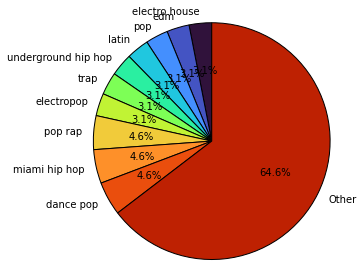

In [59]:
print("There are {0} unique genres in the playlist.".format(num_genres))
plot_pie(x,y)